In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
new_model = YOLO("yolov8n.pt") 


In [ ]:
# model
new_model

# 3. Make Detections with Images

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:

results_2 = new_model.predict(img)
results_2

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results_2[0].plot()))
# new_model.predict('/home/writer/Documents/university/2-3 summer school/datasets/data/image-010.jpeg', show=True, save=True, save_txt=True)

plt.show()

In [ ]:
# results.render()
print(dir(results_2[0]))
print()
results_2[0].plot()

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    # results = model(frame)
    results = new_model.predict(frame)
    print(results)
    
    cv2.imshow('YOLO', np.squeeze(results[0].plot()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data') #/data/images
labels = ['car_in', 'car_out', 'gate_opened', 'gate_closed']
number_imgs = 5


In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="custom.yaml", epochs=1, device=[0], workers=8, batch=8)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

print(metrics)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: []
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f93a2022350>
fitness: 0.0
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([], dtype=float64)
names: {0: 'CarIn', 1: 'CarOut', 2: 'GateOpened', 3: 'GateClosed', 4: 'GateOpened'}
plot: True
results_dict: {'metrics/precision(B)': 0.0, 'metrics/recall(B)': 0.0, 'metrics/mAP50(B)': 0.0, 'metrics/mAP50-95(B)': 0.0, 'fitness': 0.0}
save_dir: PosixPath('/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/val5')
speed: {'preprocess': 2.2098457112031826, 'inference': 12.047487146714154, 'loss': 0.0024262596579

In [2]:
path = model.export(format="onnx")  # export the model to ONNX format
path = model.export(format="torchscript")  # export the model to torchscript format
model = YOLO("/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.torchscript")


print(results)
%matplotlib inline 

plt.imshow(np.squeeze(results[0].plot()))

plt.show()

Ultralytics YOLOv8.0.117 🚀 Python-3.11.3 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5937MiB)

PyTorch: starting from /home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.pt with input shape (8, 3, 640, 640) BCHW and output shape(s) (8, 9, 8400) (5.9 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 0.6s, saved as /home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.onnx (11.7 MB)

Export complete (0.7s)
Results saved to /home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights
Predict:         yolo predict task=detect model=/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.onnx imgsz=640 data=custom.yaml 
Visualize:       https://netron.app
Ultralytic

============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



TorchScript: export success ✅ 1.1s, saved as /home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.torchscript (11.9 MB)

Export complete (1.2s)
Results saved to /home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights
Predict:         yolo predict task=detect model=/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.torchscript imgsz=640 
Validate:        yolo val task=detect model=/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.torchscript imgsz=640 data=custom.yaml 
Visualize:       https://netron.app


[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'CarIn', 1: 'CarOut', 2: 'GateOpened', 3: 'GateClosed', 4: 'GateOpened'}
orig_img: array([[[122, 148, 172],
        [120, 146, 170],
        [125, 153, 177],
        ...,
        [157, 170, 184],
        [158, 171, 185],
        [158, 171, 185]],

       [[127, 153, 177],
        [124, 150, 174],
        [127, 155, 179],
        ...,
        [158, 171, 185],
        [159, 172, 186],
        [159, 172, 186]],

       [[128, 154, 178],
        [126, 152, 176],
        [126, 154, 178],
        ...,
        [158, 171, 185],
        [158, 171, 185],
        [158, 171, 185]],

       ...,

       [[185, 185, 191],
        [182, 182, 188],
        [179, 179, 185],
        ...,
        [114, 107, 112],
        [115, 105, 111],
        [116, 106, 112]],

       [[157, 157, 163],
        [180, 180, 186],
        [185, 186, 19

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f943f8da8e0>
Traceback (most recent call last):
  File "/home/writer/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/writer/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.11/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 930, in wait
    ready = selector.select(timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/selectors.py", line 415, in select
    fd_event_list = self._selector.p

NameError: name 'plt' is not defined


image 1/1 /home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train6/val_batch1_pred.jpg: 384x640 (no detections), 75.9ms
Speed: 2.4ms preprocess, 75.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


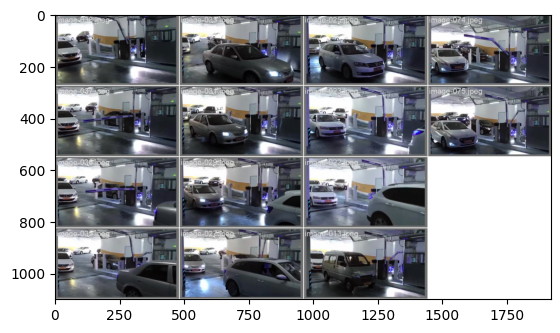

In [4]:
trained_model = YOLO('/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train11/weights/best.pt')
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
results = trained_model.predict('/home/writer/Documents/university/2-3 summer school/yolov5/runs/detect/train6/val_batch1_pred.jpg')
# results = trained_model.predict('./datasets/weapon/test/images/0ece819c-ep115_jpg.rf.e460869064f21308243c5368b9675316.jpg')
# results = new_model.predict(img)
# results = trained_model.predict(img)
# results = new_model.predict('/home/writer/Documents/university/2-3 summer school/datasets/data/image-010.jpeg')

plt.imshow(np.squeeze(results[0].plot()))

plt.show()

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/detect/train4/weights/last.pt', force_reload=True)
results = model(img)

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))

plt.show()

In [ ]:
import os

def get_files_in_folder(folder_path):
    files_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            files_list.append(file_path)
    return files_list

# Replace '/path/to/folder' with the actual path of your target directory
folder_path = 'data'
files_list = get_files_in_folder(folder_path)
print(files_list)


In [ ]:
new_model.train()

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --batch 16 --epochs 500 --data ../data.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()